In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the images.csv file into a dataframe excluding the first row from the file
images_data = pd.read_csv('Images.csv', sep=';', header=None,skiprows=1)
images_data
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(images_data))
onehot_encoded

C:\Users\As\anaconda3\envs\env_2\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,9235,9236,9237,9238,9239,9240,9241,9242,9243,9244
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Load the EdgeHistogram.csv file into a dataframe excluding the first row from the file
Edge_features = pd.read_csv('EdgeHistogram.csv', sep=';', header=None,skiprows=1)
Edge_features


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,1,1,1,1,2,2,2,4,4,2,...,1,2,2,3,3,1,1,1,1,2
1,2,2,2,1,0,3,0,4,2,2,...,1,4,3,3,5,2,2,1,0,4
2,3,5,1,6,2,6,3,2,7,1,...,3,4,7,0,6,3,2,7,3,6
3,4,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
4,5,1,6,4,2,2,0,6,6,5,...,6,2,6,3,3,6,1,2,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,9140,5,3,1,4,1,2,5,4,4,...,2,4,4,6,5,5,0,6,5,6
9140,9141,0,0,5,1,2,1,0,7,3,...,1,1,7,3,7,1,0,4,1,3
9141,9142,3,3,2,1,2,0,5,4,3,...,1,3,6,1,2,2,3,4,4,4
9142,9143,0,0,0,0,0,0,0,1,0,...,2,0,2,1,1,0,0,0,0,0


In [4]:
# Create a dictionary to map the class names to integers
class_names = set(images_data[1].values)
class_mapping = {class_name: index for index, class_name in enumerate(class_names)}
images_data[1] = images_data[1].map(class_mapping)

In [5]:
#images_data[1].map(class_mapping)

In [6]:
# Split the data into feature and target arrays
X = Edge_features.iloc[:, 1:].values
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
X = pd.DataFrame(onehot_encoder.fit_transform(X))
X

C:\Users\As\anaconda3\envs\env_2\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9141,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y = images_data[1].values
y

array([90, 46, 15, ..., 76,  1,  5], dtype=int64)

*KNN Algorithm*

Accuracy for 3 training images per class for KNN : 0.4278260869565217
Accuracy for 5 training images per class for KNN : 0.43539823008849565
Accuracy for 10 training images per class for KNN : 0.42314814814814816
Accuracy for 15 training images per class for KNN : 0.42621359223300964


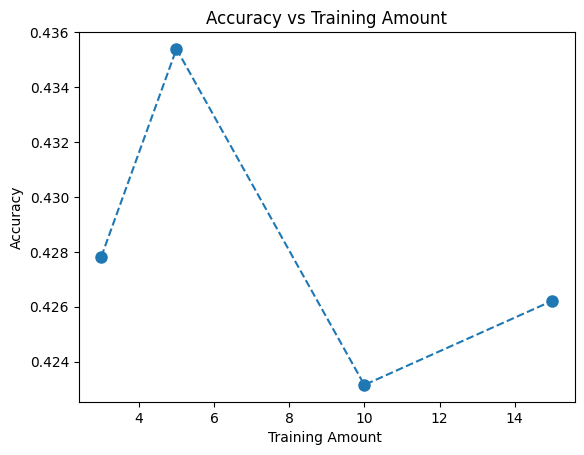

In [8]:
import matplotlib.pyplot as plt

# Iterate through the training amounts
train_amounts = [3, 5, 10, 15]
accuracy_means = []
for train_amount in train_amounts:
    accuracy_scores = []
    # Split the data into train and test sets for each iteration
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(118-train_amount), stratify=y)
        
        # Train a K-Nearest Neighbors classifier
        knn = KNeighborsClassifier(n_neighbors=8)
        knn.fit(X_train, y_train)

        # Evaluate the classifier on the test set
        y_pred = knn.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    accuracy_means.append(sum(accuracy_scores)/len(accuracy_scores))
    print(f"Accuracy for {train_amount} training images per class for KNN : {accuracy_means[-1]}")

# Plot the results
plt.plot(train_amounts, accuracy_means, marker='o', markersize=8, linestyle='dashed')
plt.xlabel('Training Amount ')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Amount')
plt.show()


*SVM Algorithm*

Accuracy for 3 training images per class for SVM: 0.5182608695652176
Accuracy for 5 training images per class for SVM: 0.49823008849557515
Accuracy for 10 training images per class for SVM: 0.4805555555555555
Accuracy for 15 training images per class for SVM: 0.49126213592233003


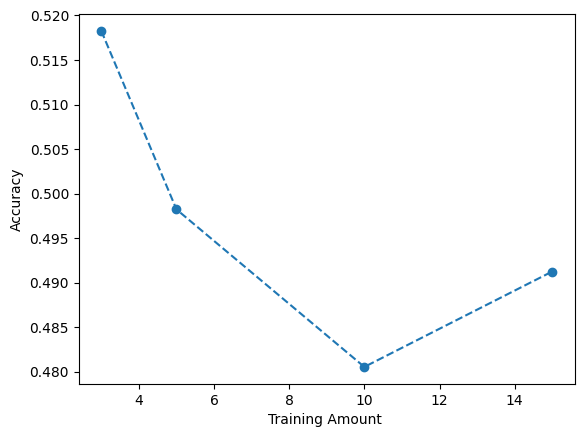

In [9]:
#svm
from sklearn import svm
# Iterate through the training amounts
train_amounts = [3, 5, 10, 15]
accuracies = []
for train_amount in train_amounts:
    accuracy_scores = []
    # Split the data into train and test sets for each iteration
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(118-train_amount), stratify=y)
        # Train the SVM model
        clf = svm.SVC(kernel='linear')
        clf.fit(X_train, y_train)
        # Evaluate the classifier on the test set
        y_pred = clf.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    accuracies.append(mean_accuracy)
    print(f"Accuracy for {train_amount} training images per class for SVM: {accuracies[-1]}")
import matplotlib.pyplot as plt
plt.plot(train_amounts, accuracies, marker='o', linestyle='dashed')
plt.xlabel('Training Amount ')
plt.ylabel('Accuracy')
plt.show()



*GaussianNB Algorithm*

Accuracy for 3 training images per class for GausianNB: 0.1408695652173913
Accuracy for 5 training images per class for GausianNB: 0.1433628318584071
Accuracy for 10 training images per class for GausianNB: 0.1472222222222222
Accuracy for 15 training images per class for GausianNB: 0.13203883495145627


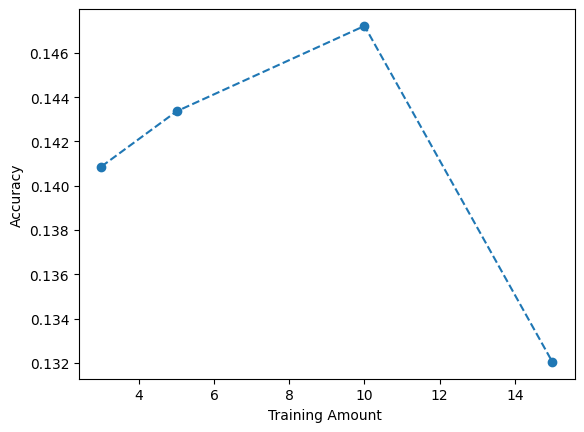

In [10]:
#bayes
from sklearn.naive_bayes import GaussianNB

# Iterate through the training amounts
train_amounts = [3, 5, 10, 15]
accuracies = []
for train_amount in train_amounts:
    accuracy_scores = []
    # Split the data into train and test sets for each iteration
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(118-train_amount), stratify=y)
        # Train the GNB model
        gnb = GaussianNB()
        gnb.fit(X_train, y_train)
        # Evaluate the classifier on the test set
        y_pred = gnb.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    accuracies.append(mean_accuracy)
    print(f"Accuracy for {train_amount} training images per class for GausianNB: {accuracies[-1]}")

import matplotlib.pyplot as plt
plt.plot(train_amounts, accuracies, marker='o', linestyle='dashed')
plt.xlabel('Training Amount ')
plt.ylabel('Accuracy')
plt.show()





*RandomForestClassifier Algorithm*

Accuracy for 3 training images per class for Randm_frst: 0.4052173913043478
Accuracy for 5 training images per class for Randm_frst: 0.395575221238938
Accuracy for 10 training images per class for Randm_frst: 0.386111111111111
Accuracy for 15 training images per class for Randm_frst: 0.4300970873786407


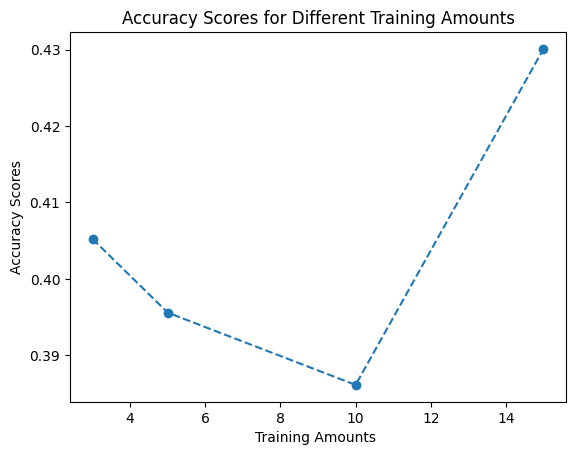

In [11]:
#random forest
#bayes
from sklearn.ensemble import RandomForestClassifier

# Iterate through the training amounts
import matplotlib.pyplot as plt

train_amounts = [3, 5, 10, 15]
accuracy_scores = []

for train_amount in train_amounts:
    scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(118-train_amount), stratify=y)
        rnf = RandomForestClassifier(n_estimators=100, random_state=0)
        rnf.fit(X_train, y_train)
        y_pred = rnf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    avg_score = sum(scores) / len(scores)
    accuracy_scores.append(avg_score)
    print(f"Accuracy for {train_amount} training images per class for Randm_frst: {accuracy_scores[-1]}")

plt.plot(train_amounts, accuracy_scores,marker='o', linestyle='dashed')
plt.xlabel("Training Amounts ")
plt.ylabel("Accuracy Scores")
plt.title("Accuracy Scores for Different Training Amounts")
plt.show()

